In [37]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def generate_previous_month_urls(url):
    # Extract month from the given URL
    parts = url.split('/')
    current_month_str = parts[-2].lower()

    # Get the current month dynamically
    current_date = datetime.now()

    # Initialize a list to hold the generated URLs
    previous_month_urls = []

    # Calculate the URLs for the previous four months
    for i in range(1, 5):
        previous_month_date = current_date - relativedelta(months=i)
        previous_month_str = previous_month_date.strftime("%B").lower()
        previous_month_url = f'{"/".join(parts[:-2])}/{previous_month_str}/'
        previous_month_urls.append(previous_month_url)

    return previous_month_urls

# Example usage:
url_to_scrape = 'https://www.ismworld.org/supply-management-news-and-reports/reports/ism-report-on-business/services/april/'
previous_month_urls = generate_previous_month_urls(url_to_scrape)

# Assigning each link to dynamically named variables
for i, url in enumerate(previous_month_urls):
    month_variable_name = f"month{i+1}"
    globals()[month_variable_name] = url

# Printing the dynamically named variables
for i in range(1, 5):
    month_variable_name = f"month{i}"
    print(f"{month_variable_name}: {globals()[month_variable_name]}")


month1: https://www.ismworld.org/supply-management-news-and-reports/reports/ism-report-on-business/services/march/
month2: https://www.ismworld.org/supply-management-news-and-reports/reports/ism-report-on-business/services/february/
month3: https://www.ismworld.org/supply-management-news-and-reports/reports/ism-report-on-business/services/january/
month4: https://www.ismworld.org/supply-management-news-and-reports/reports/ism-report-on-business/services/december/


In [38]:
import requests

# Your ScrapeOps API key
API_KEY = 'c86ce44a-a58b-4e77-95a7-996a7c375fea'

# URL to scrape
url_to_scrape = month1
url_to_scrape1 = month2
url_to_scrape2 = month3
url_to_scrape3 = month4


# Send a GET request using ScrapeOps Proxy
response = requests.get(
    url='https://proxy.scrapeops.io/v1/',
    params={
        'api_key': API_KEY,
        'url': url_to_scrape,
    }
)

# Send a GET request using ScrapeOps Proxy, this is for the second month
response1 = requests.get(
    url='https://proxy.scrapeops.io/v1/',
    params={
        'api_key': API_KEY,
        'url': url_to_scrape1,
    }
)


# Send a GET request using ScrapeOps Proxy, this is for the second month
response2 = requests.get(
    url='https://proxy.scrapeops.io/v1/',
    params={
        'api_key': API_KEY,
        'url': url_to_scrape2,
    }
)

# Send a GET request using ScrapeOps Proxy, this is for the third month
response3 = requests.get(
    url='https://proxy.scrapeops.io/v1/',
    params={
        'api_key': API_KEY,
        'url': url_to_scrape3,
    }
)



# will will loop through the responses of all the months and print the content
for response in [response, response1, response2, response3]:
    # Check if the request was successful
    if response.status_code == 200:
        # Print the response content
        print('Response body:', response.content)
    else:
        # Print the error message if the request failed
        print('Error:', response.status_code)
        


# # Check if the request was successful
# if response.status_code == 200:
#     # Print the response content
#     print('Response body:', response.content)
# else:
#     # Print the error message if the request failed
#     print('Error:', response.status_code)


Response body: b'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n    <meta charset="utf-8" />\r\n    <link href="//cdnjs.cloudflare.com" rel="dns-prefetch">\r\n    <link href="//fonts.googleapis.com" rel="dns-prefetch">\r\n    <meta name="viewport" content="width=device-width" />\r\n    <title>March</title>\r\n    <meta name="title" content="March" />\r\n    <meta property="og:title" content="March" />\r\n\r\n    <link href="/Static/css/abovethefold.css?v=1_0_8831_12457" rel="preload" as="style">\r\n    <link href="/Static/css/cake.css?v=1_0_8831_12457" rel="preload" as="style">\r\n    <link href="/Static/css/belowthefold.css?v=1_0_8831_12457" rel="preload" as="style">\r\n    <!-- OptanonConsentNoticeStart -->\r\n    <script src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script=35c0eee9-5e12-408b-ad13-e8ecc4146091></script>\r\n    <script type="text/javascript">\r\n        function OptanonWrapper() { }\r\n    </script>\r

In [39]:
html_content = response.text
html_content1 = response1.text
html_content2 = response2.text
html_content3 = response3.text

In [5]:
from bs4 import BeautifulSoup

# Example HTML content
html_content = response.text
html_content1 = response1.text
html_content2 = response2.text
html_content3 = response3.text


# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')
soup1 = BeautifulSoup(html_content1, 'html.parser')
soup2 = BeautifulSoup(html_content2, 'html.parser')
soup3 = BeautifulSoup(html_content3, 'html.parser')

# Define a function to extract desired content based on the section title
def extract_desired_content(section_title):
    # Find the <h3> tag with the specified class and text
    h3_tag = soup.find('h3', class_='text-strong text-uppercase', string=section_title)
    if h3_tag:
        # Find the second <p> tag after the <h3> tag
        p_tags = h3_tag.find_all_next('p')
        if len(p_tags) > 1:
            desired_content = p_tags[1].get_text(strip=True)  # Get text from the second <p> tag
            return desired_content
    return None

# Define a function to extract desired content based on the section title
def extract_desired_content1(section_title):
    # Find the <h3> tag with the specified class and text
    h3_tag = soup1.find('h3', class_='text-strong text-uppercase', string=section_title)
    if h3_tag:
        # Find the second <p> tag after the <h3> tag
        p_tags = h3_tag.find_all_next('p')
        if len(p_tags) > 1:
            desired_content = p_tags[1].get_text(strip=True)  # Get text from the second <p> tag
            return desired_content
    return None

def extract_desired_content2(section_title):
    # Find the <h3> tag with the specified class and text
    h3_tag = soup2.find('h3', class_='text-strong text-uppercase', string=section_title)
    if h3_tag:
        # Find the second <p> tag after the <h3> tag
        p_tags = h3_tag.find_all_next('p')
        if len(p_tags) > 1:
            desired_content = p_tags[1].get_text(strip=True)  # Get text from the second <p> tag
            return desired_content
    return None

def extract_desired_content3(section_title):
    # Find the <h3> tag with the specified class and text
    h3_tag = soup3.find('h3', class_='text-strong text-uppercase', string=section_title)
    if h3_tag:
        # Find the second <p> tag after the <h3> tag
        p_tags = h3_tag.find_all_next('p')
        if len(p_tags) > 1:
            desired_content = p_tags[1].get_text(strip=True)  # Get text from the second <p> tag
            return desired_content
    return None



# Extract the desired content for "Supplier Deliveries" section
business_activity_content = extract_desired_content("Business Activity")
business_activity_content1 = extract_desired_content1("Business Activity")
business_activity_content2 = extract_desired_content2("Business Activity")
business_activity_content3 = extract_desired_content3("Business Activity")


supplier_deliveries_content = extract_desired_content("Supplier Deliveries")
supplier_deliveries_content1 = extract_desired_content1("Supplier Deliveries")
supplier_deliveries_content2 = extract_desired_content2("Supplier Deliveries")
supplier_deliveries_content3 = extract_desired_content3("Supplier Deliveries")

new_orders_content = extract_desired_content("New Orders")
new_orders_content1 = extract_desired_content1("New Orders")
new_orders_content2 = extract_desired_content2("New Orders")
new_orders_content3 = extract_desired_content3("New Orders")


employment_content = extract_desired_content("Employment")
employment_content1 = extract_desired_content1("Employment")
employment_content2 = extract_desired_content2("Employment")
employment_content3 = extract_desired_content3("Employment")

Invetories = extract_desired_content("Inventories")
Invetories1 = extract_desired_content1("Inventories")
Invetories2 = extract_desired_content2("Inventories")
Invetories3 = extract_desired_content3("Inventories")

prices_content = extract_desired_content("Prices")
prices_content1 = extract_desired_content1("Prices")
prices_content2 = extract_desired_content2("Prices")
prices_content3 = extract_desired_content3("Prices")

new_export_orders_content = extract_desired_content("New Export Orders")
new_export_orders_content1 = extract_desired_content1("New Export Orders")
new_export_orders_content2 = extract_desired_content2("New Export Orders")
new_export_orders_content3 = extract_desired_content3("New Export Orders")

imports_content = extract_desired_content("Imports")
imports_content1 = extract_desired_content1("Imports")
imports_content2 = extract_desired_content2("Imports")
imports_content3 = extract_desired_content3("Imports")

buying_policy_content = extract_desired_content("Buying Policy")
buying_policy_content1 = extract_desired_content1("Buying Policy")
buying_policy_content2 = extract_desired_content2("Buying Policy")
buying_policy_content3 = extract_desired_content3("Buying Policy")



# we will print all the content using a for loop
#we will add a new line after each print

print(business_activity_content)
print()
print(business_activity_content1)
print()
print(business_activity_content2)

# print()
# print(supplier_deliveries_content)
# print()
# print(new_orders_content)
# print()
# print(employment_content)
# print()
# print(Invetories)
# print()
# print(prices_content)
# print()
# print(new_export_orders_content)
# print()
# print(imports_content)
# print()
# print(buying_policy_content)


# print("Supplier Deliveries Content:")
# print(supplier_deliveries_content)


The 12 industries reporting an increase in business activity for the month of December — listed in order — are: Agriculture, Forestry, Fishing & Hunting; Health Care & Social Assistance; Retail Trade; Accommodation & Food Services; Finance & Insurance; Transportation & Warehousing; Other Services; Mining; Utilities; Professional, Scientific & Technical Services; Public Administration; and Information. The five industries reporting a decrease in business activity for the month of December are: Real Estate, Rental & Leasing; Arts, Entertainment & Recreation; Construction; Management of Companies & Support Services; and Educational Services.

The 13 industries reporting an increase in business activity for the month of February — listed in order — are: Retail Trade; Agriculture, Forestry, Fishing & Hunting; Finance & Insurance; Wholesale Trade; Accommodation & Food Services; Public Administration; Construction; Health Care & Social Assistance; Management of Companies & Support Services; U

In [6]:
from collections import OrderedDict
import pandas as pd

# List of industries reported to increase and decrease in business activity for January
INCREASE_INDUSTRIES_JANUARY = [
    "Agriculture, Forestry, Fishing & Hunting",
    "Health Care & Social Assistance",
    "Utilities",
    "Management of Companies & Support Services",
    "Public Administration",
    "Professional, Scientific & Technical Services",
    "Wholesale Trade",
    "Finance & Insurance",
    "Educational Services",
    "Transportation & Warehousing"
]

DECREASE_INDUSTRIES_JANUARY = [
    "Retail Trade",
    "Real Estate, Rental & Leasing",
    "Information",
    "Mining",
    "Arts, Entertainment & Recreation"
]


def process_paragraph(para_text):
    """
    Process the provided paragraph containing information about industries reporting growth and decrease.
    Returns a dictionary where keys are industries and values indicate growth or decrease.
    """
    # Split the paragraph into sentences
    sentences = para_text.split(".")
    growth_sentence = sentences[0]
    decrease_sentence = sentences[1]

    list_industries_growth = get_list_of_industries_from_sentence(growth_sentence)
    list_industries_decrease = get_list_of_industries_from_sentence(decrease_sentence)

    # Find neutral industries
    list_industries_neutral = [industry for industry in INCREASE_INDUSTRIES_JANUARY + DECREASE_INDUSTRIES_JANUARY
                               if industry not in list_industries_growth and industry not in list_industries_decrease]

    industries_dict = create_dict_of_industries(list_industries_growth, list_industries_neutral, list_industries_decrease)

    return industries_dict


def get_list_of_industries_from_sentence(sentence):
    """
    Creates a list of industries based on the given sentence.
    """
    list_industries = []
    for industry in INCREASE_INDUSTRIES_JANUARY + DECREASE_INDUSTRIES_JANUARY:
        if industry in sentence:
            list_industries.append(industry)
    return list_industries


def create_dict_of_industries(list_growth, list_neutral, list_decrease):
    """
    Creates a dictionary of key-value pairs where the key is the industry,
    and the value indicates growth (positive), neutrality (0), or decrease (negative).
    """
    industries_dict = OrderedDict()

    growth_index = len(list_growth)
    for growth_industry in list_growth:
        industries_dict[growth_industry] = growth_index
        growth_index -= 1

    for neutral_industry in list_neutral:
        industries_dict[neutral_industry] = 0

    decrease_index = len(list_decrease)
    for decrease_industry in list_decrease:
        industries_dict[decrease_industry] = -decrease_index
        decrease_index -= 1

    return industries_dict





def create_dataframe(paragraph):
    # Process the paragraph
    industries_dict = process_paragraph(paragraph)

    # Create a DataFrame from the dictionary
    df = pd.DataFrame(industries_dict.items(), columns=['Industry', 'Label'])

    # Add State column based on Label
    df['State'] = df['Label'].apply(lambda x: 'Growth' if x > 0 else ('Neutral' if x == 0 else 'Decrease'))

    return df


# List of content variables
content_variables = [
    business_activity_content, business_activity_content1, business_activity_content2, business_activity_content3,
    supplier_deliveries_content, supplier_deliveries_content1, supplier_deliveries_content2, supplier_deliveries_content3,
    new_orders_content, new_orders_content1, new_orders_content2, new_orders_content3,
    employment_content, employment_content1, employment_content2, employment_content3,
    Invetories, Invetories1, Invetories2, Invetories3,
    prices_content, prices_content1, prices_content2, prices_content3,
    new_export_orders_content, new_export_orders_content1, new_export_orders_content2, new_export_orders_content3,
    imports_content, imports_content1, imports_content2, imports_content3,
    
    
    
]

# Create DataFrames for each content variable
dataframes = [create_dataframe(content) for content in content_variables]
# what are the dataframes that we have created, their names and the content



# Print each DataFrame
for idx, df in enumerate(dataframes):
    print(f"DataFrame {idx + 1}:")
    print(df)
    print()



DataFrame 1:
                                         Industry  Label     State
0        Agriculture, Forestry, Fishing & Hunting     10    Growth
1                 Health Care & Social Assistance      9    Growth
2                                       Utilities      8    Growth
3                           Public Administration      7    Growth
4   Professional, Scientific & Technical Services      6    Growth
5                             Finance & Insurance      5    Growth
6                    Transportation & Warehousing      4    Growth
7                                    Retail Trade      3    Growth
8                                     Information      2    Growth
9                                          Mining      1    Growth
10                                Wholesale Trade      0   Neutral
11     Management of Companies & Support Services     -4  Decrease
12                           Educational Services     -3  Decrease
13                  Real Estate, Rental & Leasing

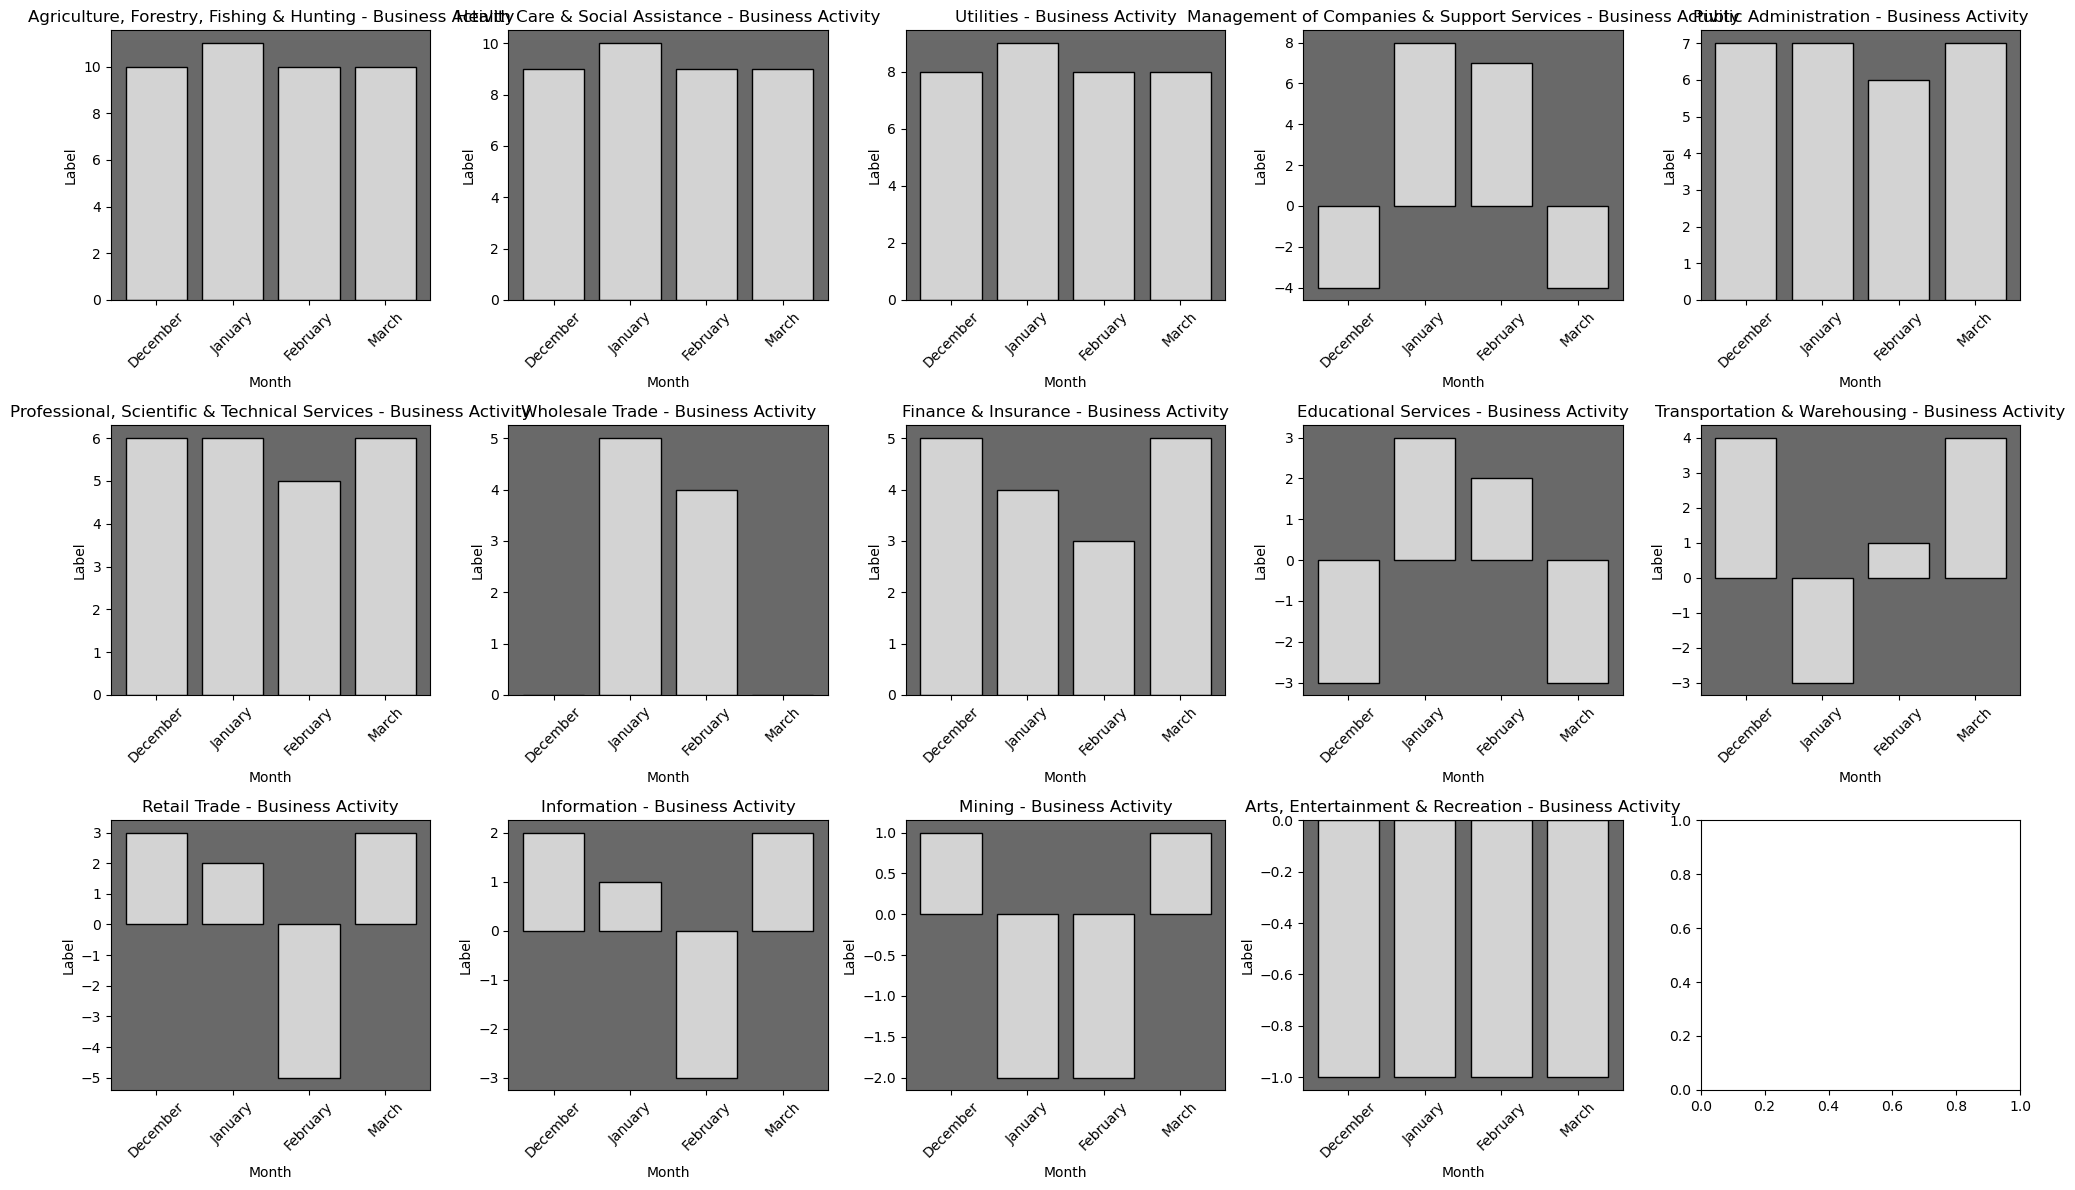

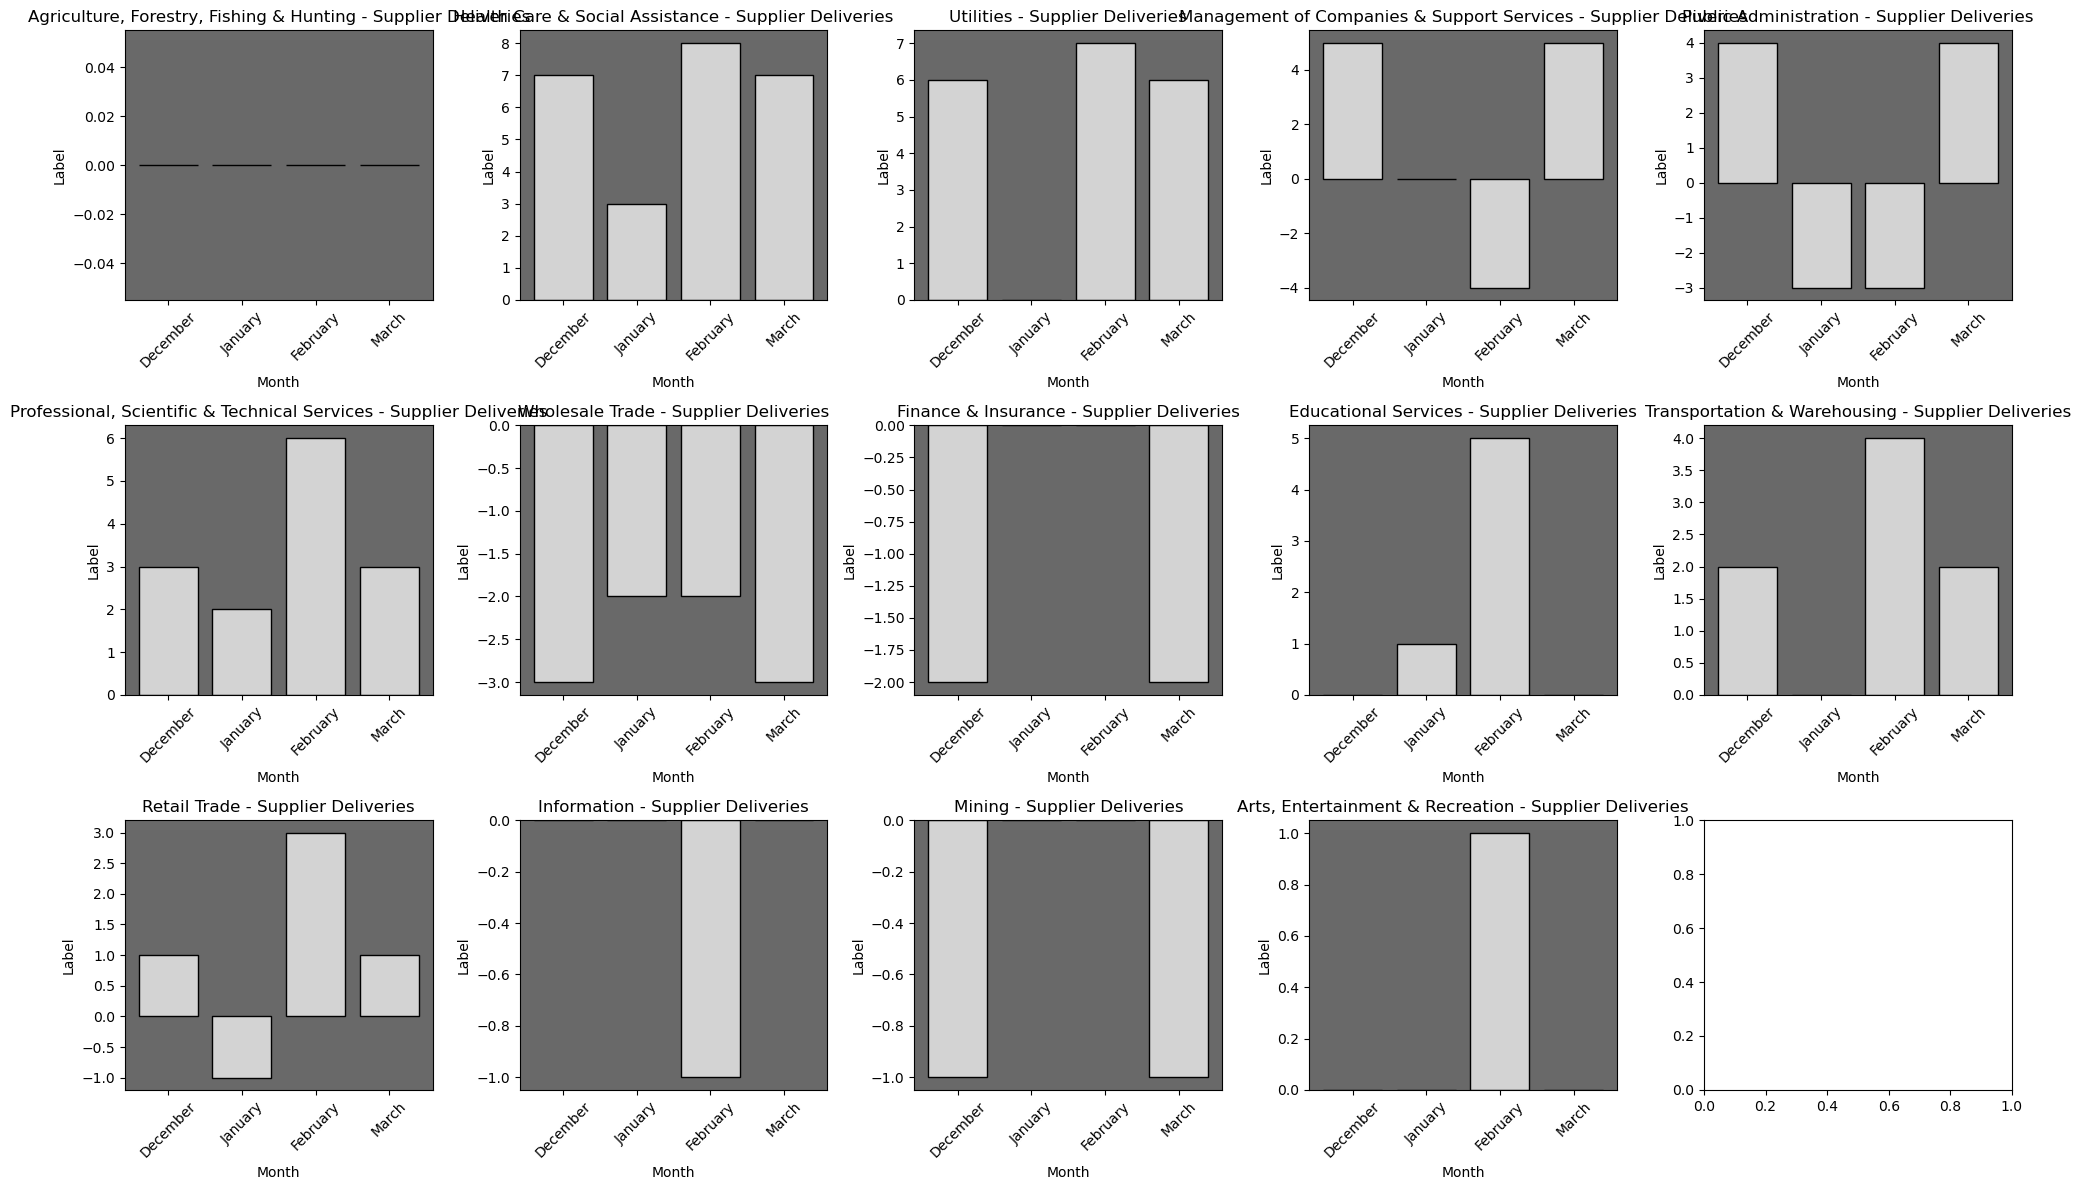

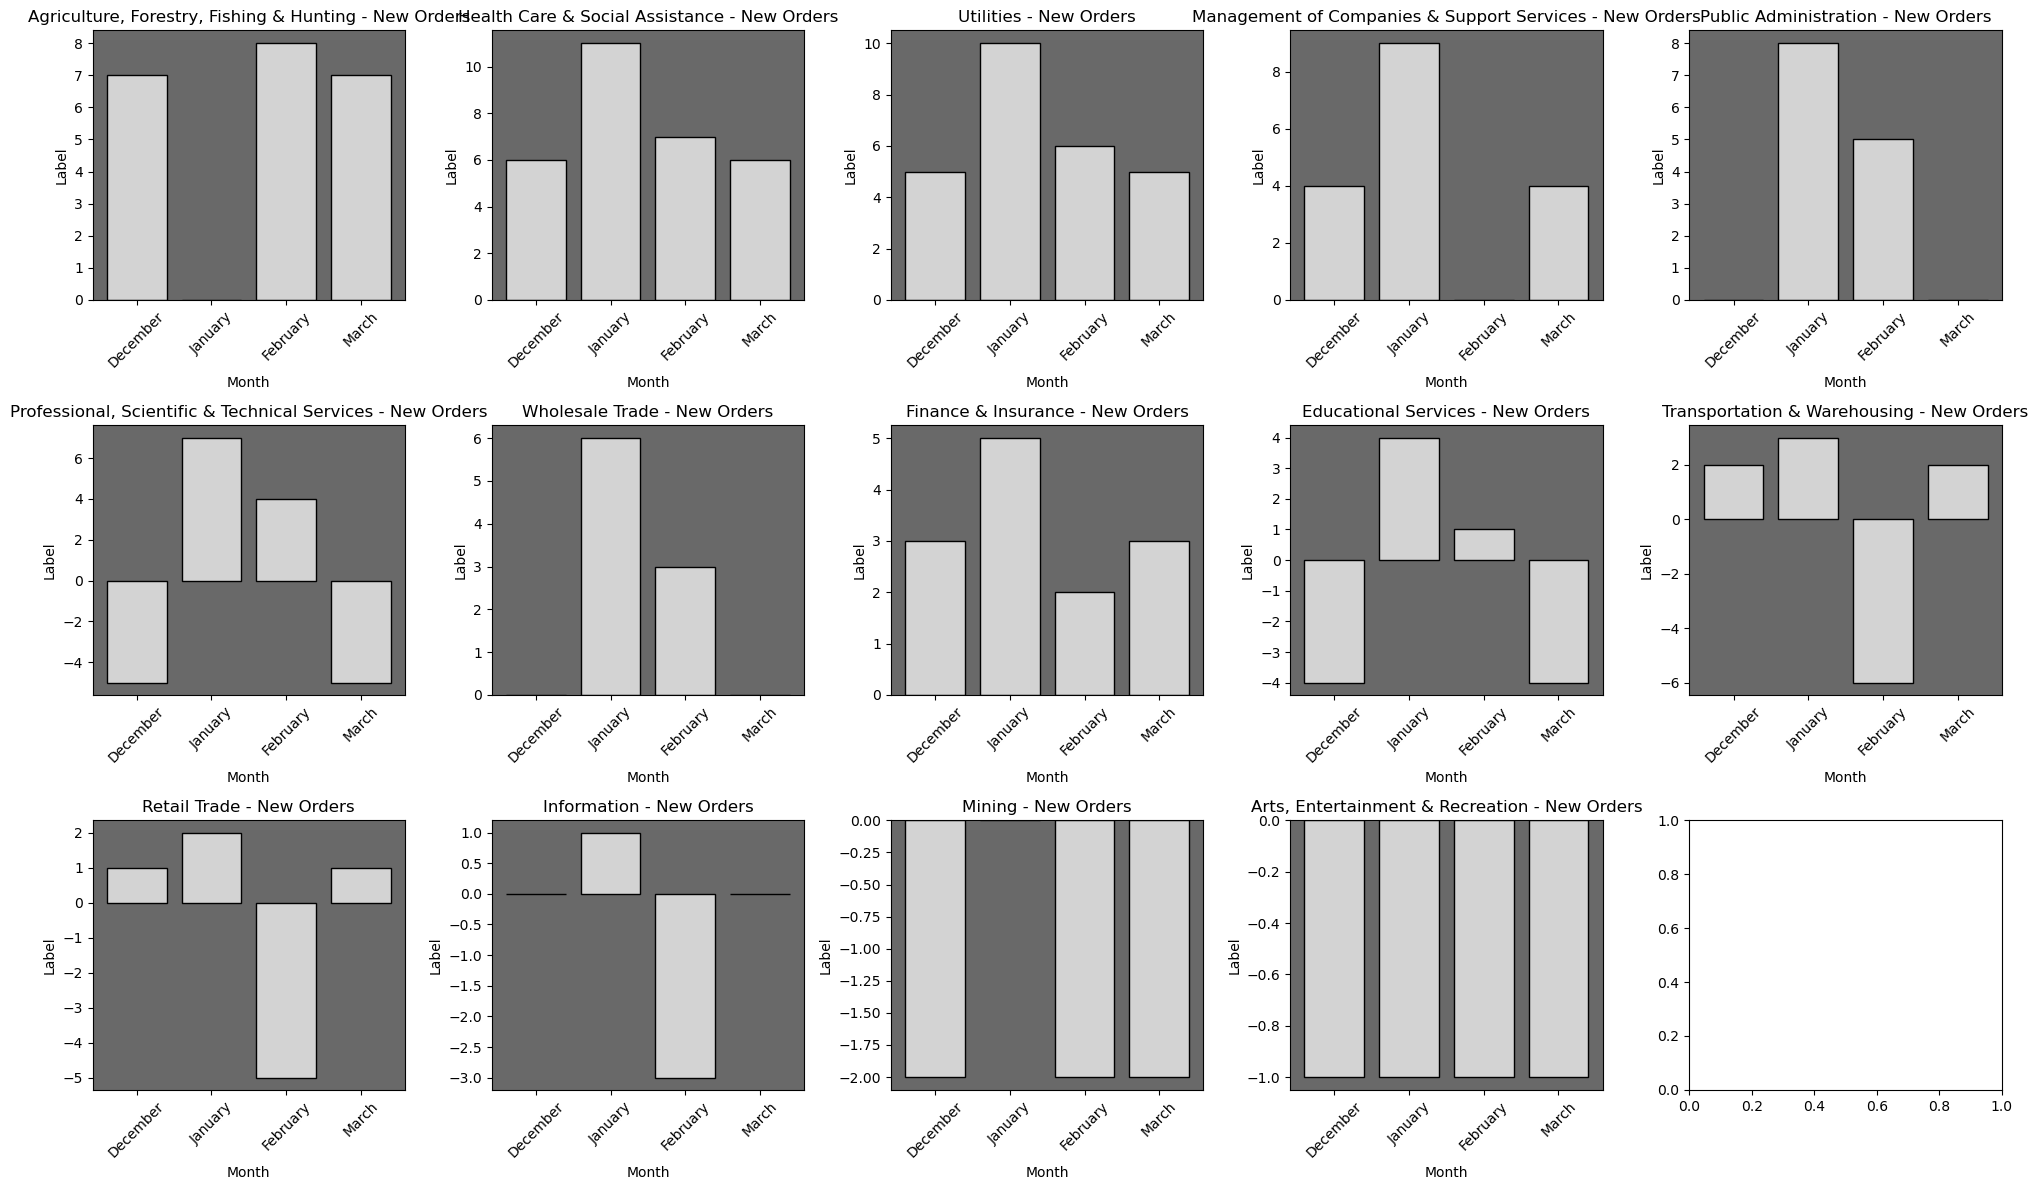

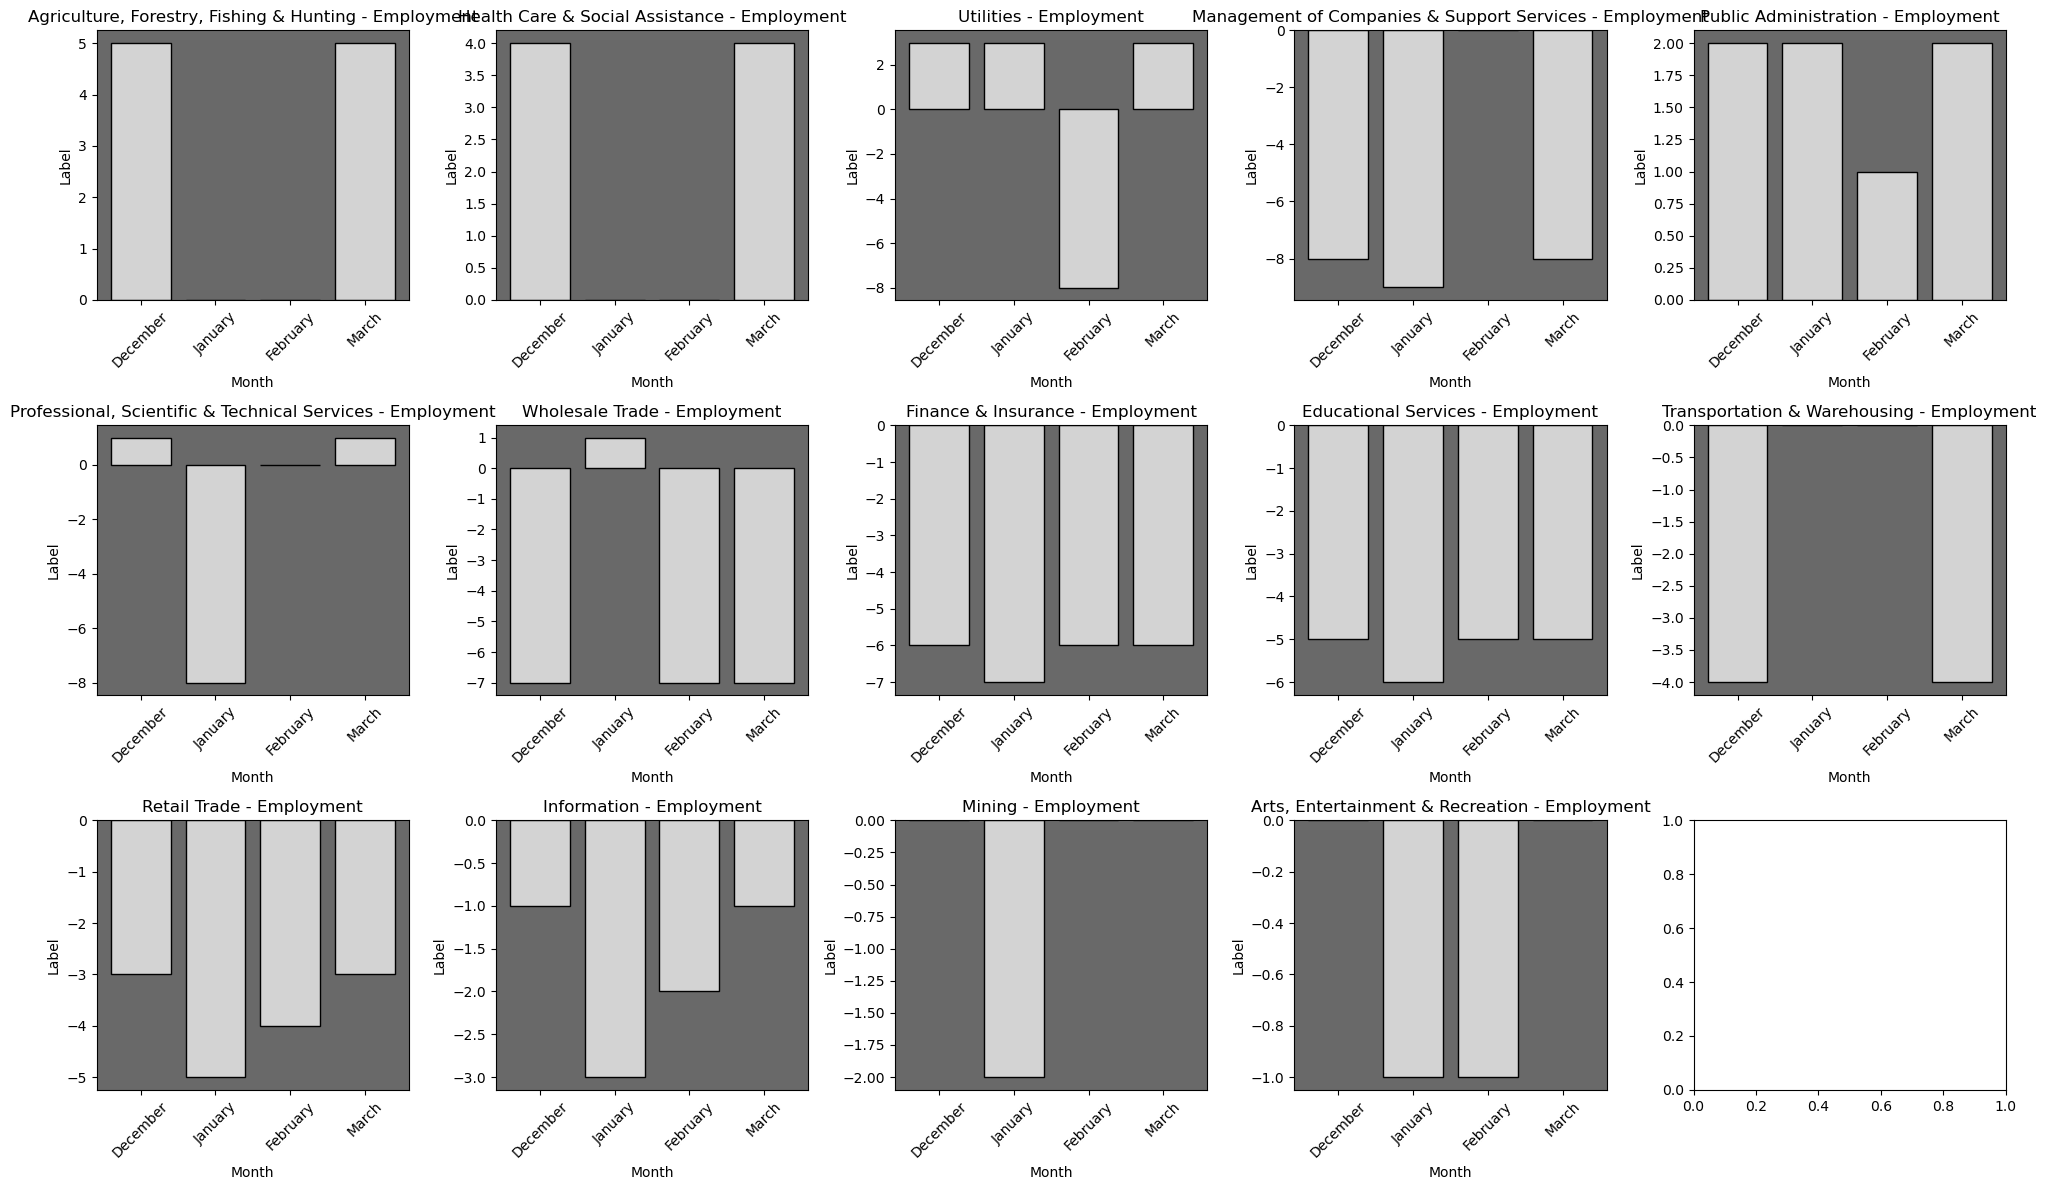

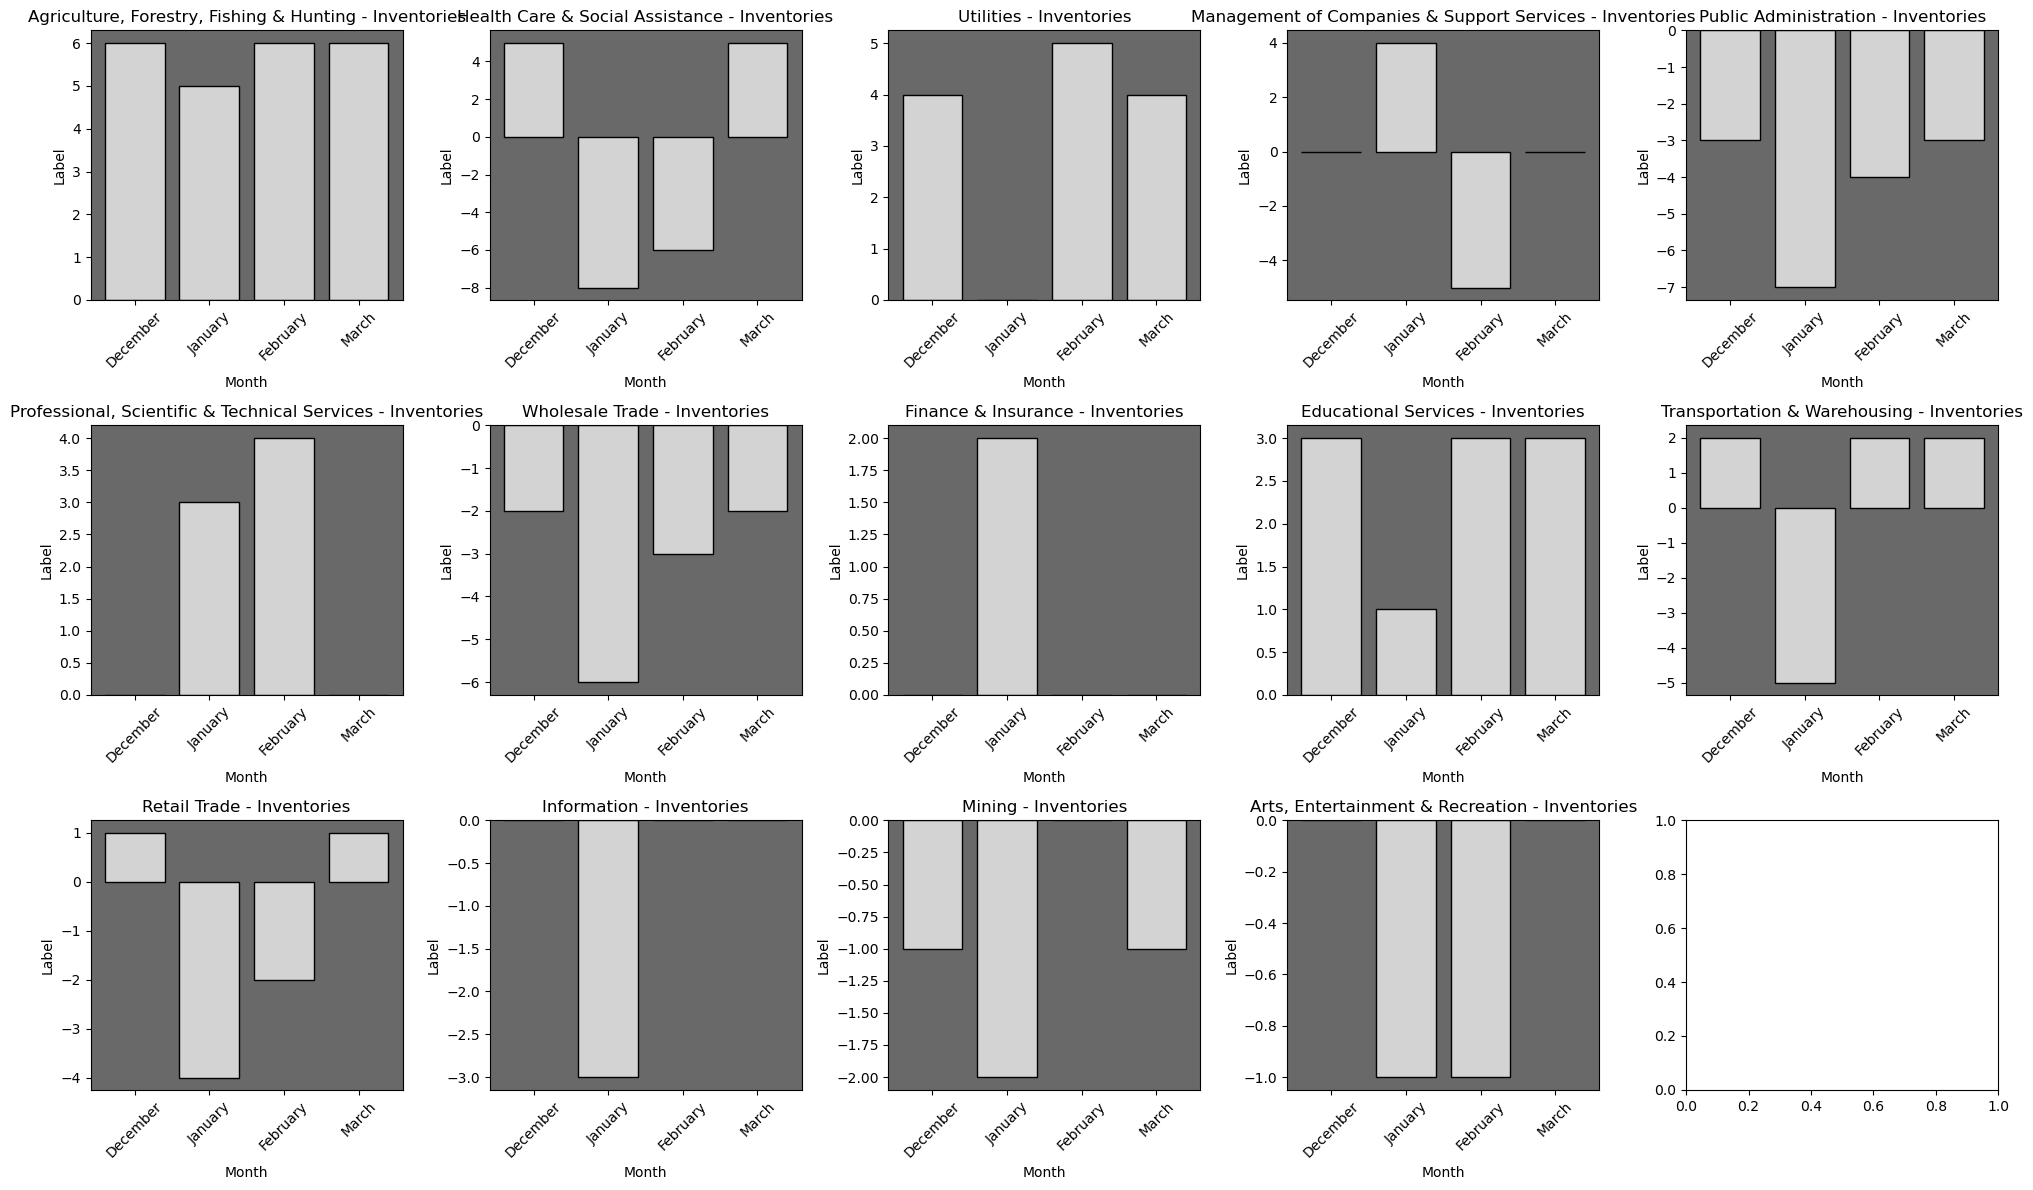

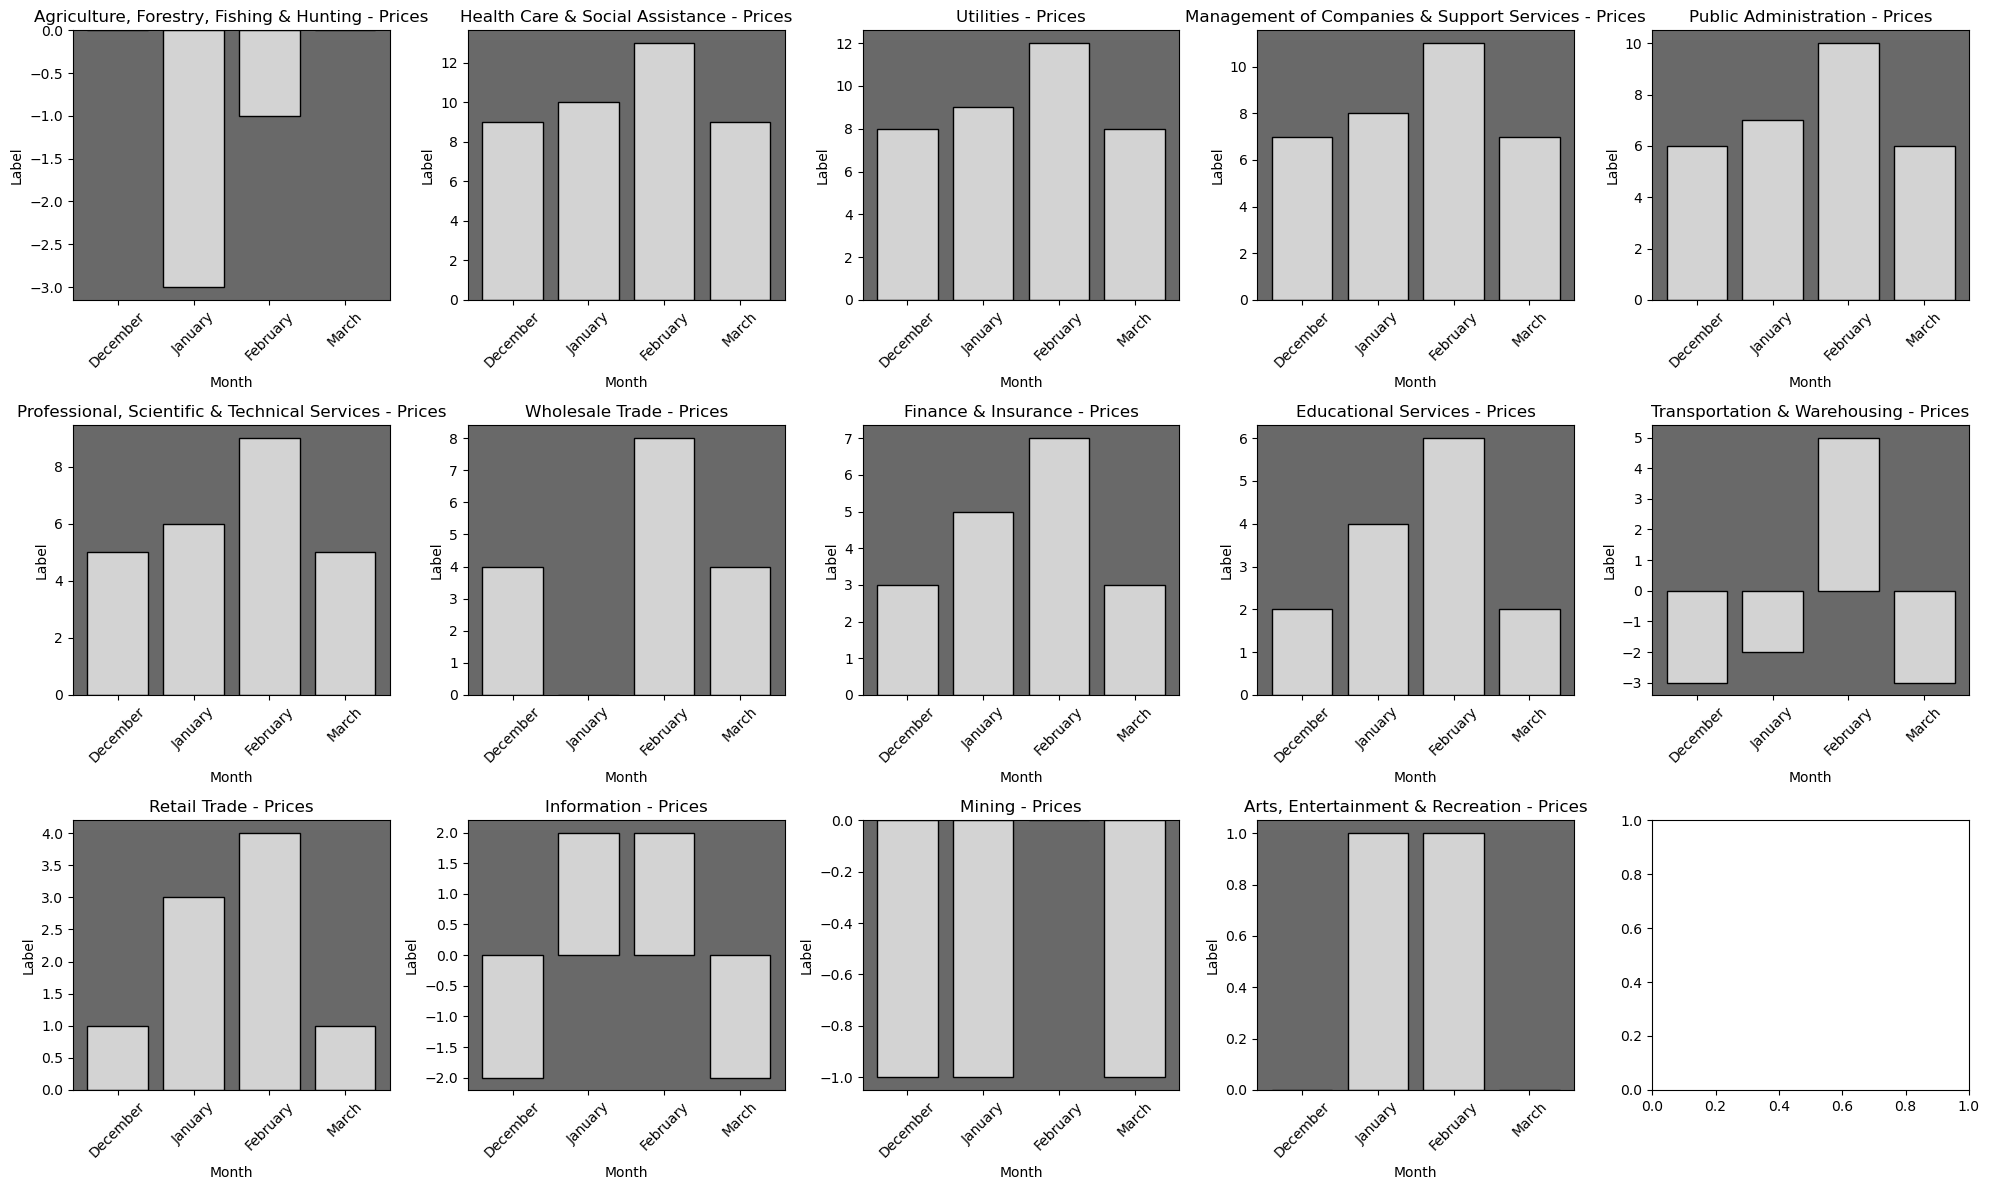

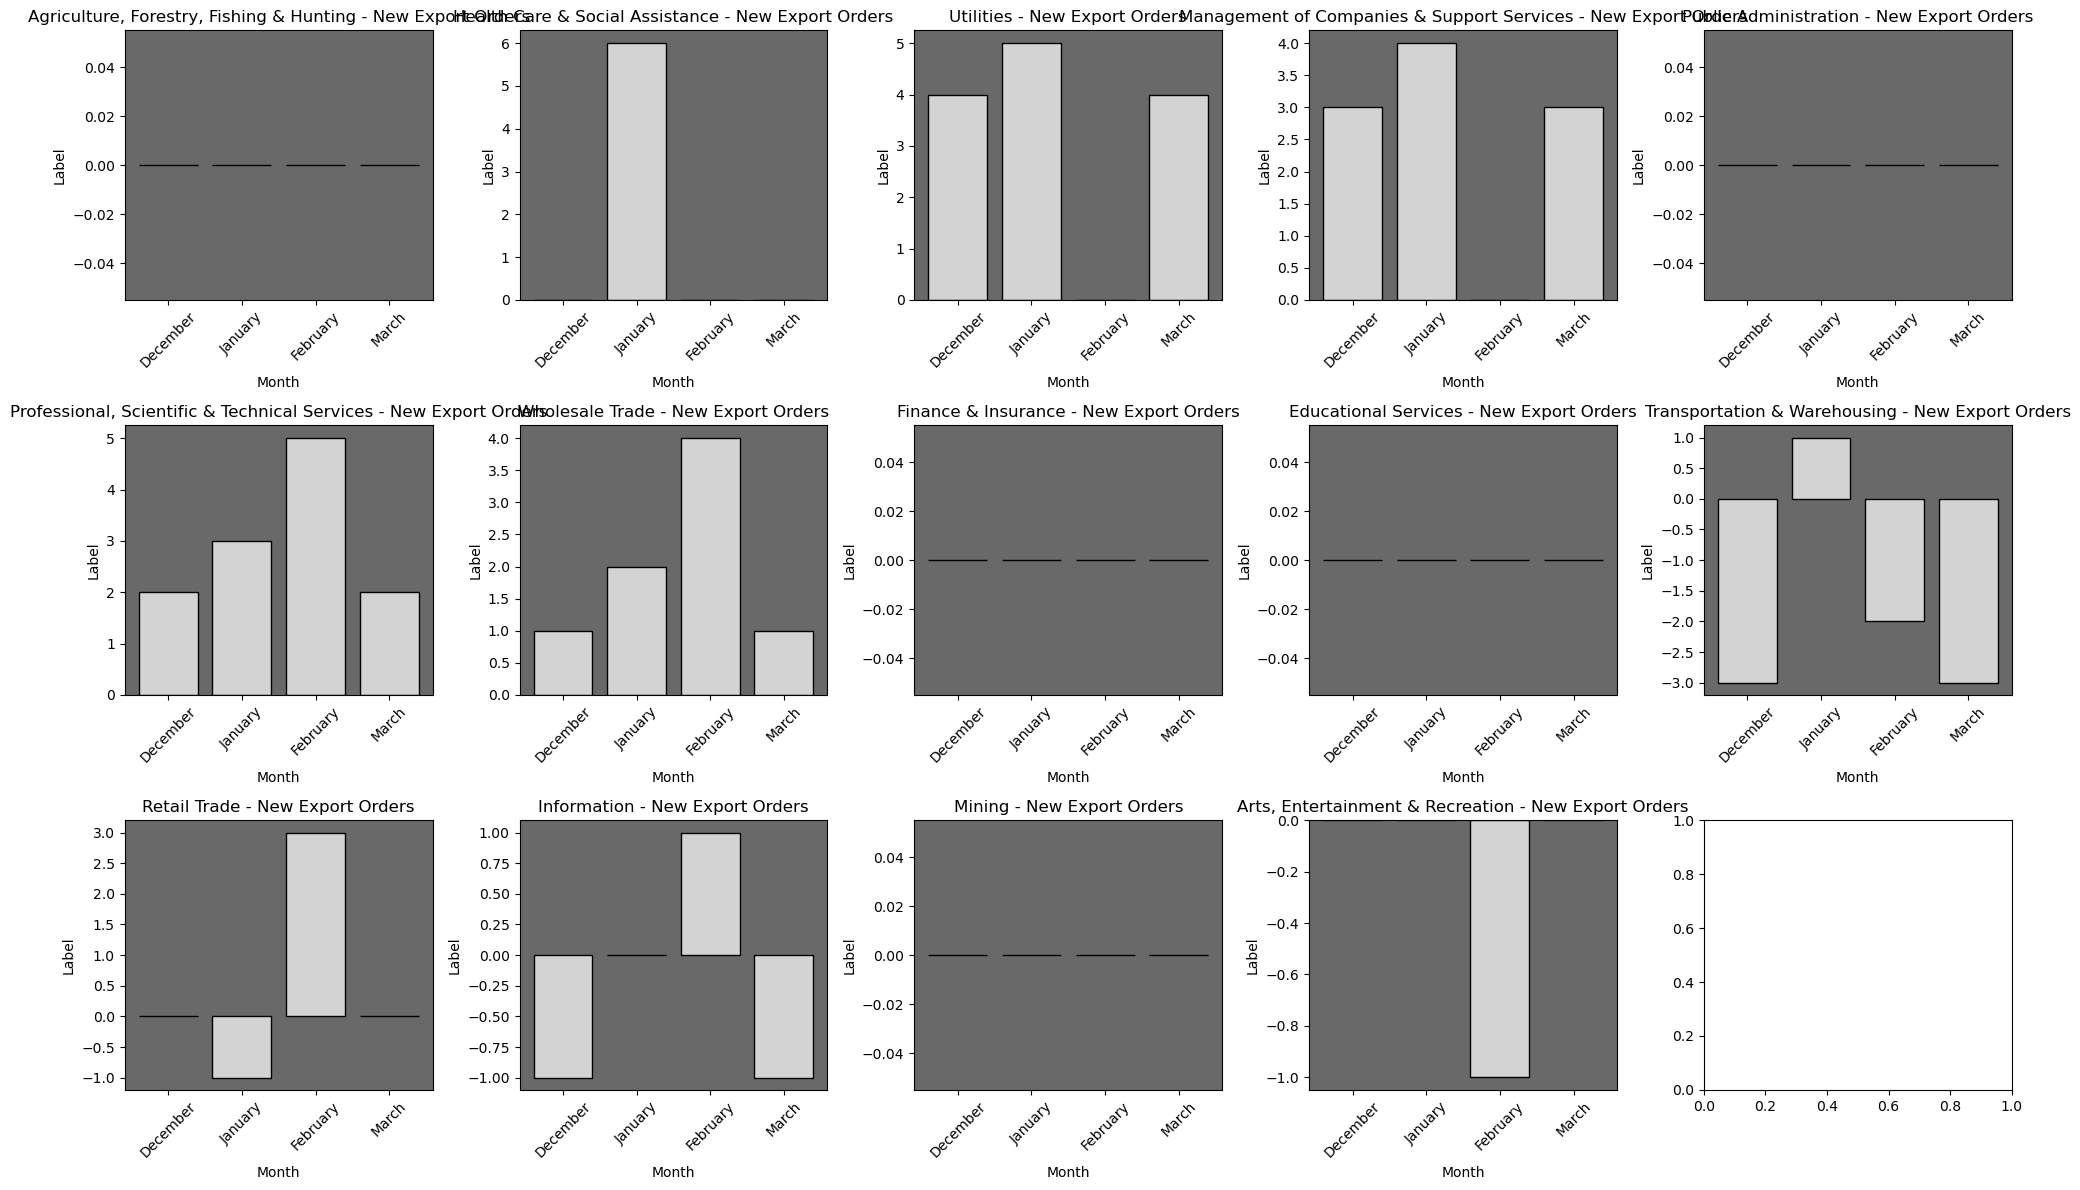

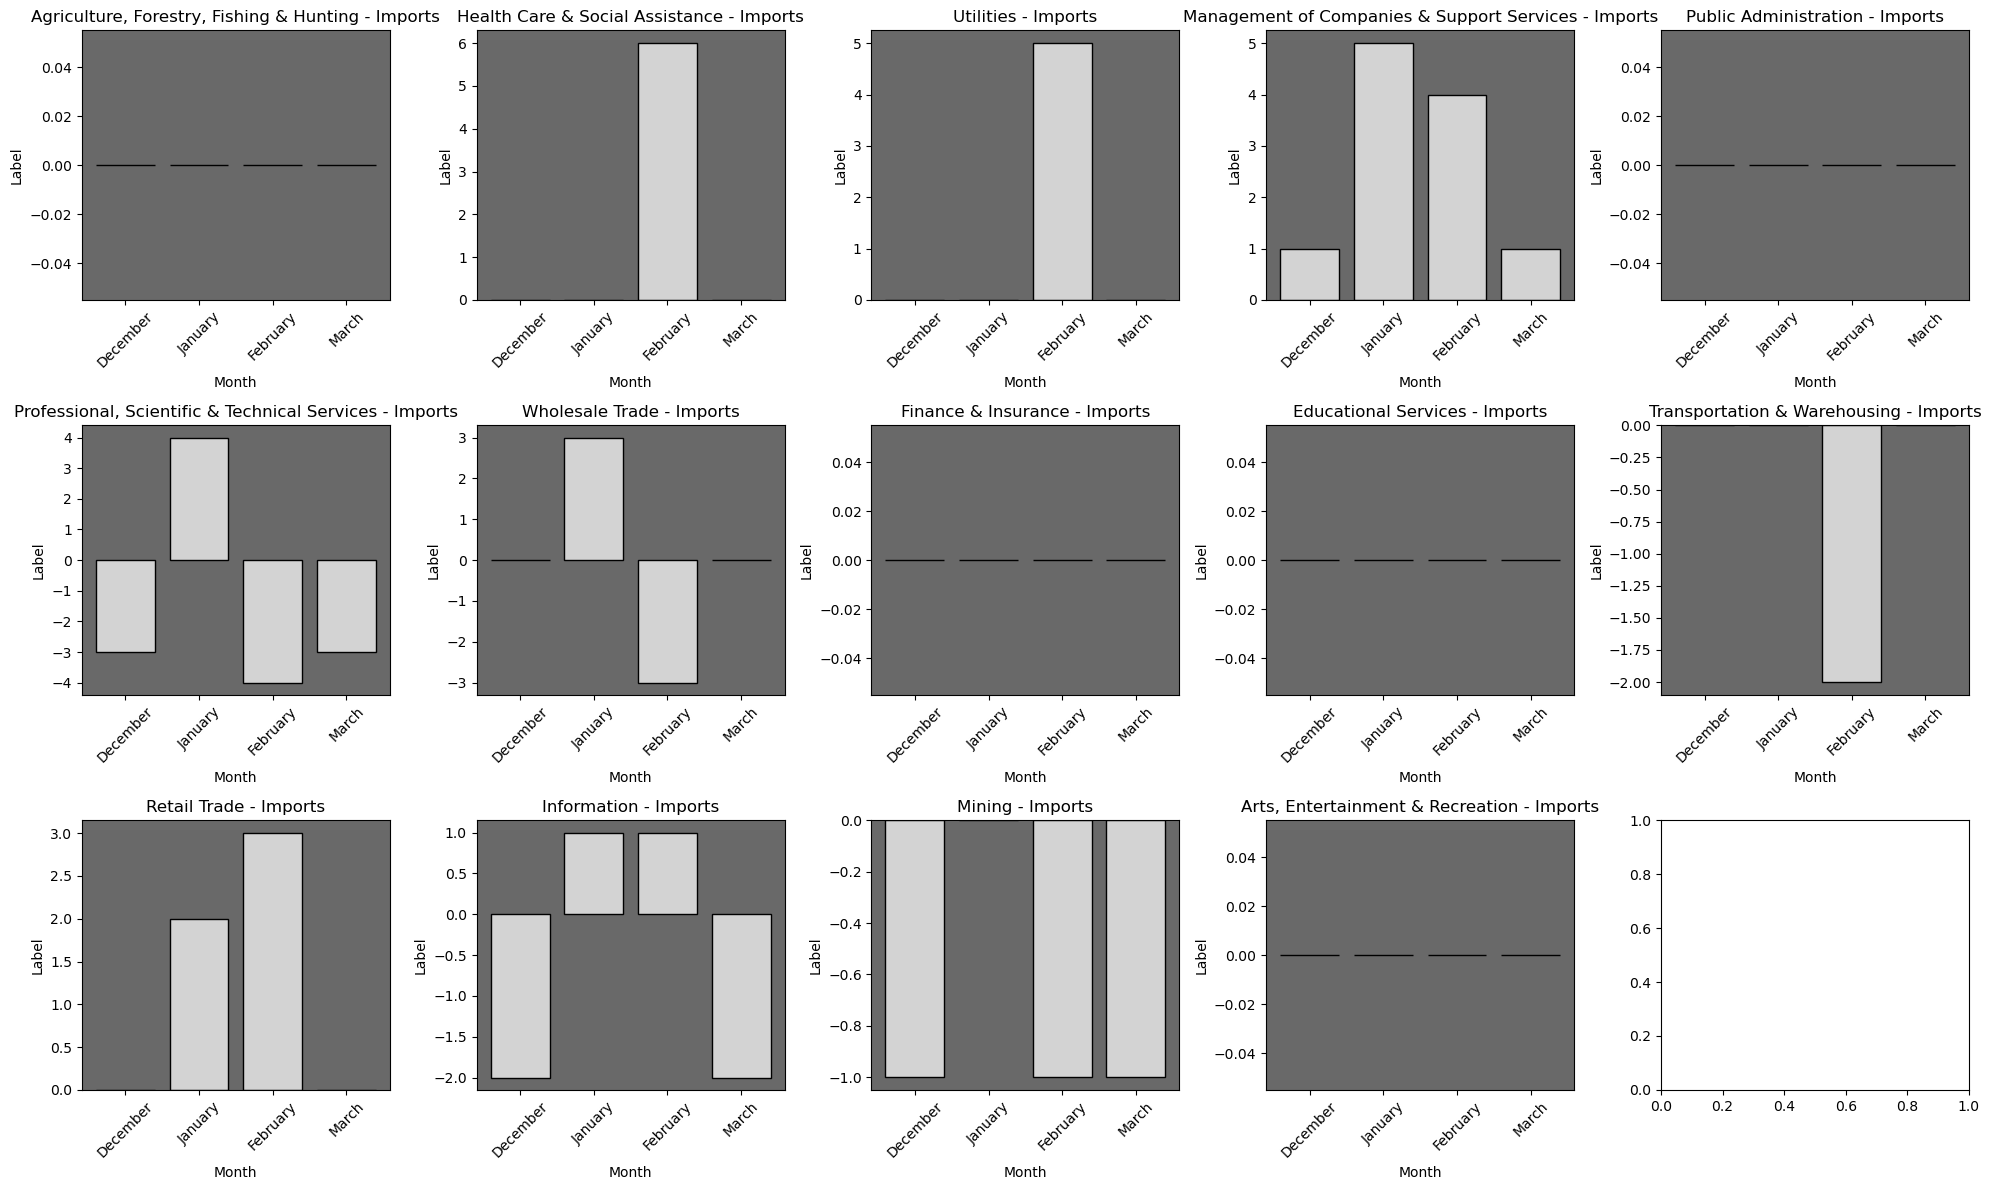

In [34]:
import datetime
import matplotlib.pyplot as plt

def get_three_prior_months():
    # Get current month and year
    current_date = datetime.datetime.now()
    current_month = current_date.month

    # List of month names
    month_names = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']

    # Calculate the three prior months
    three_prior_months = []
    for _ in range(4):
        current_month -= 1
        if current_month == 0:
            current_month = 12
        three_prior_months.append(month_names[current_month - 1])

    return three_prior_months

# Example usage
prior_months = get_three_prior_months()
reverted_prior_months = prior_months[::-1]

Industries = [
    "Agriculture, Forestry, Fishing & Hunting",
    "Health Care & Social Assistance",
    "Utilities",
    "Management of Companies & Support Services",
    "Public Administration",
    "Professional, Scientific & Technical Services",
    "Wholesale Trade",
    "Finance & Insurance",
    "Educational Services",
    "Transportation & Warehousing",
    "Retail Trade",
    "Information",
    "Mining",
    "Arts, Entertainment & Recreation"
]

sections = [
    "Business Activity",
    "Supplier Deliveries",
    "New Orders",
    "Employment",
    "Inventories",
    "Prices",
    "New Export Orders",
    "Imports",
]

# Loop through sections and industries to plot the data
for section_index, section in enumerate(sections):
    # Set up subplots for each section
    fig, axes = plt.subplots(3, 5, figsize=(20, 12))
    axes = axes.flatten()

    # Extracting and plotting data for each industry
    for industry_index, industry in enumerate(Industries):
        industry_values = [df.loc[df['Industry'] == industry, 'Label'].values[0] for df in dataframes]

        # Extract values for the current section
        section_values = industry_values[section_index * 4: (section_index + 1) * 4]

        # Plotting the data as a bar chart
        axes[industry_index].bar(reverted_prior_months[:4], section_values, color='b')
        axes[industry_index].set_xlabel('Month')
        axes[industry_index].set_ylabel('Label')
        axes[industry_index].set_title(f'{industry} - {section}')
        axes[industry_index].tick_params(axis='x', rotation=45)
        # the color of the bars
        axes[industry_index].set_facecolor('dimgrey')
        # bar color
        axes[industry_index].bar(reverted_prior_months[:4], section_values, color='lightgrey', edgecolor='black')
        # we will add edge color to the bars, being black
        axes[industry_index].spines['bottom'].set_color('black')

    plt.tight_layout()
    plt.show()


In [41]:
# we will save the plot as a png file
plt.savefig('plot.png')

<Figure size 640x480 with 0 Axes>

In [36]:
# import datetime
# import matplotlib.pyplot as plt

# def get_three_prior_months():
#     # Get current month and year
#     current_date = datetime.datetime.now()
#     current_month = current_date.month

#     # List of month names
#     month_names = ['January', 'February', 'March', 'April', 'May', 'June',
#                    'July', 'August', 'September', 'October', 'November', 'December']

#     # Calculate the three prior months
#     three_prior_months = []
#     for _ in range(4):
#         current_month -= 1
#         if current_month == 0:
#             current_month = 12
#         three_prior_months.append(month_names[current_month - 1])

#     return three_prior_months

# # Example usage
# prior_months = get_three_prior_months()
# reverted_prior_months = prior_months[::-1]

# Industries = [
#     "Agriculture, Forestry, Fishing & Hunting",
#     "Health Care & Social Assistance",
#     "Utilities",
#     "Management of Companies & Support Services",
#     "Public Administration",
#     "Professional, Scientific & Technical Services",
#     "Wholesale Trade",
#     "Finance & Insurance",
#     "Educational Services",
#     "Transportation & Warehousing",
#     "Retail Trade",
#     "Information",
#     "Mining",
#     "Arts, Entertainment & Recreation"
# ]

# sections = [
#     "Business Activity",
#     "Supplier Deliveries",
#     "New Orders",
#     "Employment",
#     "Inventories",
#     "Prices",
#     "New Export Orders",
#     "Imports",
# ]

# # Loop through sections and industries to plot the data
# for section_index, section in enumerate(sections):
#     # Set up subplots for each section
#     fig, axes = plt.subplots(3, 5, figsize=(20, 12))
#     axes = axes.flatten()

#     # Extracting and plotting data for each industry
#     for industry_index, industry in enumerate(Industries):
#         industry_values = [df.loc[df['Industry'] == industry, 'Label'].values[0] for df in dataframes]

#         # Extract values for the current section
#         section_values = industry_values[section_index * 4: (section_index + 1) * 4]

#         # Plotting the data as a bar chart
#         axes[industry_index].bar(reverted_prior_months[:4], section_values, color='b')
#         axes[industry_index].set_xlabel('Month')
#         axes[industry_index].set_ylabel('Label')
#         axes[industry_index].set_title(f'{industry} - {section}')
#         axes[industry_index].tick_params(axis='x', rotation=45)

#     plt.tight_layout()
#     plt.show()


In [26]:
# import datetime
# import matplotlib.pyplot as plt

# def get_three_prior_months():
#     # Get current month and year
#     current_date = datetime.datetime.now()
#     current_month = current_date.month

#     # List of month names
#     month_names = ['January', 'February', 'March', 'April', 'May', 'June',
#                    'July', 'August', 'September', 'October', 'November', 'December']

#     # Calculate the three prior months
#     three_prior_months = []
#     for _ in range(4):
#         current_month -= 1
#         if current_month == 0:
#             current_month = 12
#         three_prior_months.append(month_names[current_month - 1])

#     return three_prior_months

# # Example usage
# prior_months = get_three_prior_months()
# reverted_prior_months = prior_months[::-1]


# retail_trade_values = [df.loc[df['Industry'] == 'Retail Trade', 'Label'].values[0] for df in dataframes]

# Industries = [
#     "Agriculture, Forestry, Fishing & Hunting",
#     "Health Care & Social Assistance",
#     "Utilities",
#     "Management of Companies & Support Services",
#     "Public Administration",
#     "Professional, Scientific & Technical Services",
#     "Wholesale Trade",
#     "Finance & Insurance",
#     "Educational Services",
#     "Transportation & Warehousing",
#     "Retail Trade",
#     "Information",
#     "Mining",
#     "Arts, Entertainment & Recreation"
    
# ]

# sections = [
#     "Business Activity",
#     "Supplier Deliveries",
#     "New Orders",
#     "Employment",
#     "Inventories",
#     "Prices",
#     "New Export Orders",
#     "Imports",
# ]
# # now will will extract the values for each industry, however we want to plot the values for a given , for instance we want to plot Agriculture, Forestry, Fishing & Hunting values for the last four months and title starting from business activity then so on
# # we will loop through the industries and extract the values for each industry
# for industry in Industries:
#     industry_values = [df.loc[df['Industry'] == industry, 'Label'].values[0] for df in dataframes]





# # I want to set the first four reports to be for the business activity, that means well will have for business activity 4 X 14 = 56 values just for business activity
# # the next 4 will be for the supplier deliveries , so would have 4 X 14 = 56 values for supplier deliveries and so on

# # we will start our loop from the first index of the sections list, which is business activity





    
# # the first 4 report wil be for the business activity, the next 4 will be for the supplier deliveries and so on
# # we will loop through the sections and extract the values for each section





# # #Extracting the value from the column 3 where Industry is "Agriculture, Forestry, Fishing & Hunting"
# # Agriculture_values = [df.loc[df['Industry'] == 'Agriculture, Forestry, Fishing & Hunting', 'Label'].values[0] for df in dataframes]
# # #Utilites
# # Utilites_values = [df.loc[df['Industry'] == 'Utilities', 'Label'].values[0] for df in dataframes]
# # #Management of Companies & Support Services
# # Management_values = [df.loc[df['Industry'] == 'Management of Companies & Support Services', 'Label'].values[0] for df in dataframes]
# # #Public Administration
# # Public_Administration_values = [df.loc[df['Industry'] == 'Public Administration', 'Label'].values[0] for df in dataframes]
# # #Professional, Scientific & Technical Services
# # Professional_Scientific_Technical_Services_values = [df.loc[df['Industry'] == 'Professional, Scientific & Technical Services', 'Label'].values[0] for df in dataframes]
# # #Wholesale Trade
# # Wholesale_Trade_values = [df.loc[df['Industry'] == 'Wholesale Trade', 'Label'].values[0] for df in dataframes]
# # #Finance & Insurance
# # Finance_Insurance_values = [df.loc[df['Industry'] == 'Finance & Insurance', 'Label'].values[0] for df in dataframes]
# # #Educational Services
# # Educational_Services_values = [df.loc[df['Industry'] == 'Educational Services', 'Label'].values[0] for df in dataframes]
# # #Information
# # Information_values = [df.loc[df['Industry'] == 'Information', 'Label'].values[0] for df in dataframes]
# # #Real Estate, Rental & Leasing
# # Real_Estate_Rental_Leasing_values = [df.loc[df['Industry'] == 'Real Estate, Rental & Leasing', 'Label'].values[0] for df in dataframes]
# # #Transportation & Warehousing
# # Transportation_Warehousing_values = [df.loc[df['Industry'] == 'Transportation & Warehousing', 'Label'].values[0] for df in dataframes]  
# # #Mining
# # Mining_values = [df.loc[df['Industry'] == 'Mining', 'Label'].values[0] for df in dataframes]
# # #Arts, Entertainment & Recreation
# # Arts_Entertainment_Recreation_values = [df.loc[df['Industry'] == 'Arts, Entertainment & Recreation', 'Label'].values[0] for df in dataframes]






# # Now we will plot the all the data with a figsize of 4 being the width and 3 being the height, for all the industries in df, which represents the dataframe number 1






# # # Plotting the data as a bar chart
# # plt.figure(figsize=(4, 3))# in figsize 4 represents the width and 5 represents the height
# # plt.bar(reverted_prior_months[:4], retail_trade_values[:4], color='b', label='Retail Trade')# 4 represents the number of months
# # plt.xlabel('Month')
# # plt.ylabel('Label')
# # plt.title('Retail Trade Label Over the Last Four Months')
# # plt.legend()
# # plt.show()


ValueError: 'business activity' is not in list